# [CoE202] note 02c. Linear regression with closed form solution (n-D)

- Class Date : 2021.03.11.
- Office Hour : -----------
- If you have any questions, upload on KLMS Q&A board, or ask directly at the TA office hours (Zoom)

In [1]:
# this is just an annotation
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)

## 2. Linear regression extension

In this example, we have multi-dimensional independent variable.
Let's see how we can perform linear regression.

In [2]:
# data points
X = np.array([[0.0, 1.0], [1.0, 1.0], [2.0, 2.0], [3.0, 1.0],  [4.0, 1.0],  [5.0, 3.0]]) 
y = np.array([0.0, 1.1, 0.9, 3.1, 3.8, 3.1])

As you can see below. we have two independent variables and one dependent variable.

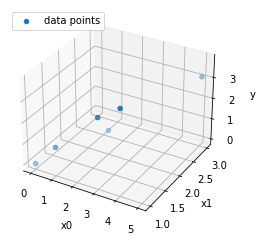

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, label = 'data points') 
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.show()

Below, we need to fill out a function that converts datapoints into a feature matrix.
We also need a function that can vectorize y.

In [4]:
## YOU SHOULD FILL IN THIS PART\

def linear_features(x, K):    
    # computes the feature matrix (N x (K+1))        
    X = x.reshape(-1, K)  
    N, D = X.shape    
    X_aug = np.hstack([np.ones((N, 1)), X])  # augmented X of size 6 x (K+1)
    return X_aug

def vectorize_y(y):
    y_vec = y.reshape(-1, 1)
    return y_vec

In [5]:
# convert our data into matrix form
X_aug = linear_features(X, 2)
y_vec = vectorize_y(y)

print(X)
print(X_aug)
print(y)
print(y_vec)

[[0. 1.]
 [1. 1.]
 [2. 2.]
 [3. 1.]
 [4. 1.]
 [5. 3.]]
[[1. 0. 1.]
 [1. 1. 1.]
 [1. 2. 2.]
 [1. 3. 1.]
 [1. 4. 1.]
 [1. 5. 3.]]
[0.  1.1 0.9 3.1 3.8 3.1]
[[0. ]
 [1.1]
 [0.9]
 [3.1]
 [3.8]
 [3.1]]


## 2-1. Linear regression with closed form solution

We can use the same equation again
for linear regression (with multi-dimensional input).
![](https://drive.google.com/uc?export=view&id=1cBc0sQxsnFcfnaCNxcCrf_ixVe-6Bh_r)


Let's fill out the function below.

In [6]:
## YOU SHOULD FILL IN THIS PART

def np_linearfit(X_aug, y):    
    # X: m x 2 matrix of training inputs
    # y: m x 1 vector of training targets/observations
    # returns: coefficients  (2 x 1)
    theta = (np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T) @ y
    return theta

And then perform the regression.

In [7]:
# get coefficients 
theta = np_linearfit(X_aug, y_vec)
print(theta)

[[ 0.96829268]
 [ 0.9804878 ]
 [-0.94634146]]


To visualize our function, we are going to create a 2-d grid as a test data
and then evaluate the value of our linear function at the grid points.

In [8]:
# plot results
xp0 = np.linspace(0, 5, 100) 
xp1 = np.linspace(0, 5, 100)
Xtest = np.mgrid[0:5:0.25, 0:5:0.25].reshape(2,-1).T  # 10000 x 2 vector for test inputs
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])

prediction = Xtest_aug @ theta

Let's visualize the plane and see if it seems to agree with the data points!

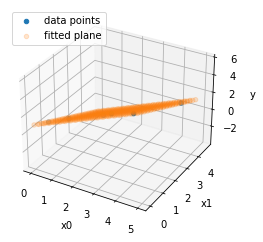

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, label = 'data points') 
ax.scatter(Xtest[:, 0], Xtest[:, 1], prediction, label = 'fitted plane', alpha=0.2)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.show()